In [1]:
from sklearn.datasets import load_iris
import pdb
import matplotlib
from sklearn.metrics import roc_curve, auc
import numpy as np  
import pandas as pd  
from sklearn import linear_model  
from sklearn.preprocessing import OneHotEncoder  
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def read_data(data_file):
    try:

        t_X,t_y=load_svmlight_file(data_file)
        return t_X.todense(),t_y
    except ValueError as e:
        print(e)


def oneHot(datasets):
    encode = OneHotEncoder() 
    encode.fit(datasets)
    return encode


def gbdt(train_X,train_Y):
    gbdt=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)
    gbdt.fit(train_X,train_Y)
    return gbdt


def gbdt_lr(train_X,train_Y,test_X,test_Y):
    gbdt_model = gbdt(train_X,train_Y)
    tree_feature = gbdt_model.apply(train_X)
    encode = oneHot(tree_feature)
    tree_feature = encode.transform(tree_feature).toarray()

    lr = LogisticRegression()
    lr.fit(tree_feature, train_Y)

    test_X = gbdt_model.apply(test_X)
    tree_feature_test = encode.transform(test_X)
    y_pred = lr.predict_proba(tree_feature_test)[:,1]

    y_test=test_Y

    auc = metrics.roc_auc_score(test_Y, y_pred)

    precision, recall, thresholds = precision_recall_curve(test_Y, y_pred)
    plt.plot(recall, precision)
    plt.show()
    auc = metrics.roc_auc_score(test_Y, y_pred)
    print "gbdt+lr:",auc
    #============================
    
    fpr, tpr, roc_thresholds= metrics.roc_curve(test_Y, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label=" auc=" + str(auc))
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    plt.savefig("roc.png")
    return precision, recall,thresholds,y_pred,fpr,tpr,roc_thresholds

def lr(train_X,train_Y,test_X,test_Y):
    lr = LogisticRegression()
    encode = oneHot(train_X)
    feature = encode.transform(train_X).toarray()
    
    lr.fit(feature, train_Y)
    
    y_pred = lr.predict_proba(test_X)[:,1]
    auc = metrics.roc_auc_score(test_Y, y_pred)
    
    print "only lr:",auc



In [ ]:
def gbdt_train(train_X,train_Y,test_X,test_Y):
    model = gbdt(train_X,train_Y)
    y_pred = model.predict(test_X)
    auc = metrics.roc_auc_score(test_Y, y_pred)
    print "only gbdt:",auc
    
    precision, recall, thresholds = precision_recall_curve(test_Y, y_pred)
    plt.plot(recall, precision)
    plt.show()
    
    fpr, tpr, roc_thresholds = metrics.roc_curve(test_Y, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label=" auc=" + str(auc))
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    plt.savefig("only_roc.png")
    
    
    
    return precision, recall,thresholds,y_pred,fpr,tpr,roc_thresholds



In [2]:
df = pd.read_csv('transformed_data.csv')

x = df.iloc[: ,0:-2].values
y = df.iloc[:, -1].values

print x.shape,y.shape


x_array = np.array(x)
y_array = np.array(y)

X = x_array[:,0:-2]
Y = y_array

#train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)

#p1,r1,t1 ,pred = gbdt_lr(train_X,train_Y,test_X,test_Y)
#lr(train_X,train_Y,test_X,test_Y)
#gbdt_train(train_X,train_Y,test_X,test_Y)

(236696, 12) (236696,)


In [ ]:
def sm_sample(x_train,y_train):
    sm = SMOTE()
    # x_array = np.array(x)
    # y_array = np.array(y)
    usx = x_train.astype('float64')
    usy = y_train.astype('float64')

    X_res, y_res = sm.fit_sample(usx, usy)
  #  print(format(Counter(y_train)))
  #  print('Resampled dataset shape {}'.format(Counter(y_res)))

    #print("Random Forest: ")
    #fp_index,fn_index=rf_train(X_res,y_res,x_test,y_test,test_index)
    return X_res,y_res


In [ ]:
from imblearn.over_sampling import SMOTE

#train_X, train_Y=sm_sample(train_X,train_Y)

#p1,r1 ,t= gbdt_lr(train_X,train_Y,test_X,test_Y)
#lr(train_X,train_Y,test_X,test_Y)
p2,r2,t2,pred2=gbdt_lr(train_X,train_Y,test_X,test_Y)


In [3]:
def fpfn(y_test,y_pred,ts):
    y_predict=(y_pred>ts).astype(int)
    #prediction=pred_y-pred
    TP, FP, FN, TN = 0, 0, 0, 0
    for i in xrange(len(y_test)):
        if y_test[i] == 1 and y_predict[i] == 1:
            TP += 1
        if y_test[i] == 0 and y_predict[i] == 1:
            FP += 1
        if y_test[i] == 1 and y_predict[i] == 0:
            FN += 1
        if y_test[i] == 0 and y_predict[i] == 0:
            TN += 1
    print 'TP: ' + str(TP)
    print 'FP: ' + str(FP)
    print 'FN: ' + str(FN)
    print 'TN: ' + str(TN)

In [ ]:
#perform cross validation
from sklearn.model_selection import KFold
kf=KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X)
precision=[]
recall=[]
threshold=[]
prediction=[]
test_label=[]
for train_index, test_index in kf.split(X):
    print ("TRAIN:", train_index, "TEST:", test_index)
    train_X, test_X = X[train_index], X[test_index]
    train_Y, test_Y = Y[train_index], Y[test_index]
    
    p1,r1,t1 ,pred = gbdt_train(train_X,train_Y,test_X,test_Y)
    precision.append(p1)
    recall.append(r1)
    threshold.append(t1)
    prediction.append(pred)
    test_label.append(test_Y)
    #fpfn(test_Y,prediction)
    


In [ ]:
ri=-1

for j in range(len(recall[ri])):
    if (recall[ri][j]>0.2 and precision[ri][j]>0.15) :

        print recall[ri][j], precision[ri][j],threshold[ri][j], prediction[ri][j]
fpfn(test_Y,prediction[ri],0.0002)

('TRAIN:', array([     0,      1,      2, ..., 236693, 236694, 236695]), 'TEST:', array([    35,     39,     63, ..., 236677, 236683, 236692]))
ssss 0.9371912013536379


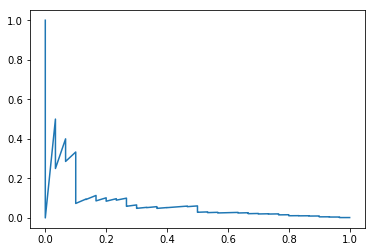

gbdt+lr: 0.9371912013536379


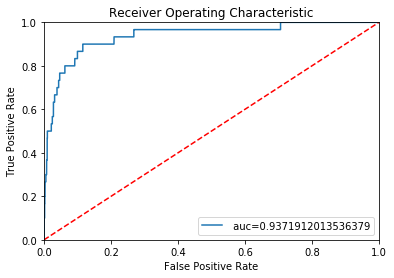

('TRAIN:', array([     0,      1,      2, ..., 236693, 236694, 236695]), 'TEST:', array([    17,     18,     41, ..., 236655, 236660, 236685]))
ssss 0.9419268214986112


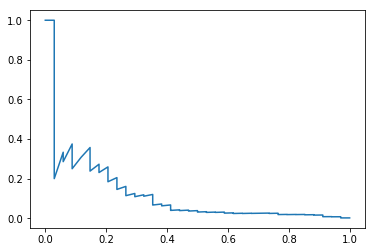

gbdt+lr: 0.9419268214986112


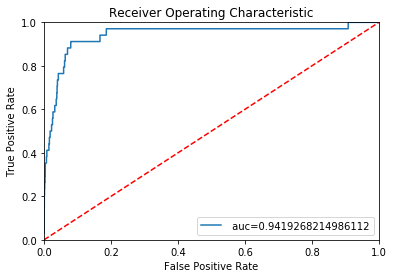

('TRAIN:', array([     0,      1,      2, ..., 236693, 236694, 236695]), 'TEST:', array([     5,     12,     25, ..., 236666, 236671, 236682]))
ssss 0.891355907737947


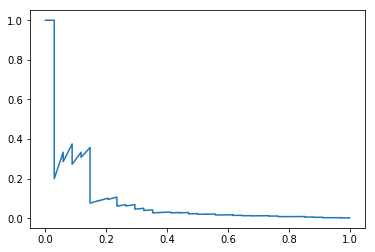

gbdt+lr: 0.891355907737947


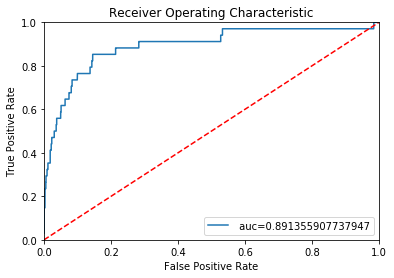

('TRAIN:', array([     0,      1,      2, ..., 236693, 236694, 236695]), 'TEST:', array([    26,     32,     38, ..., 236624, 236646, 236650]))
ssss 0.9627261337244835


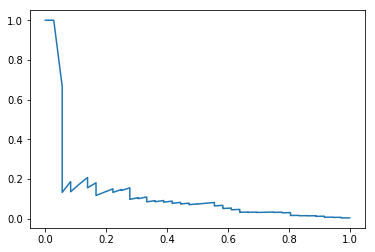

gbdt+lr: 0.9627261337244835


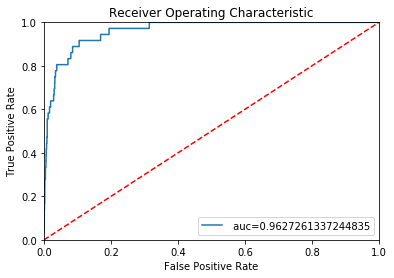

('TRAIN:', array([     0,      1,      2, ..., 236692, 236693, 236694]), 'TEST:', array([     7,     11,     28, ..., 236678, 236690, 236695]))
ssss 0.9050850836338593


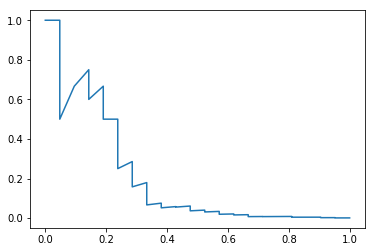

gbdt+lr: 0.9050850836338593


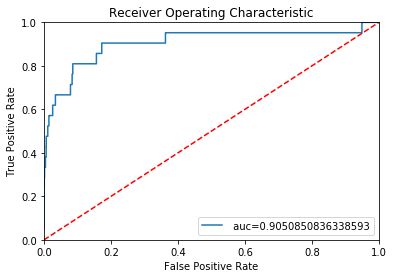

('TRAIN:', array([     0,      1,      4, ..., 236693, 236694, 236695]), 'TEST:', array([     2,      3,      9, ..., 236664, 236674, 236680]))
ssss 0.9044426649479335


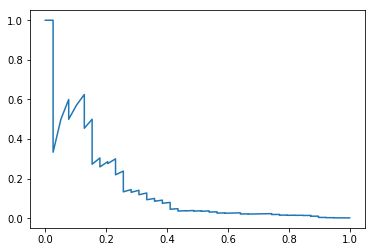

gbdt+lr: 0.9044426649479335


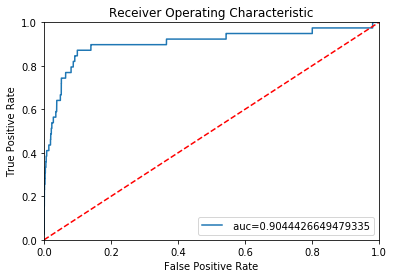

('TRAIN:', array([     0,      1,      2, ..., 236693, 236694, 236695]), 'TEST:', array([    13,     21,     24, ..., 236654, 236668, 236687]))
ssss 0.9432837557652435


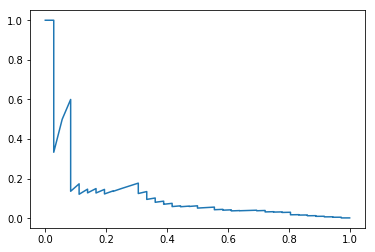

gbdt+lr: 0.9432837557652435


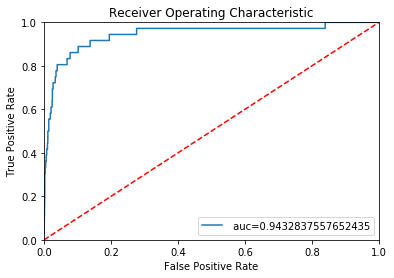

('TRAIN:', array([     0,      1,      2, ..., 236692, 236693, 236695]), 'TEST:', array([     8,     19,     45, ..., 236667, 236688, 236694]))
ssss 0.9285994482973157


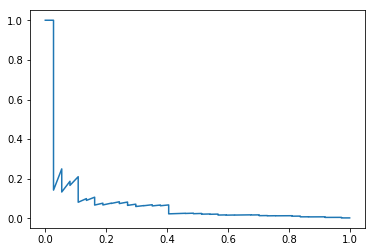

gbdt+lr: 0.9285994482973157


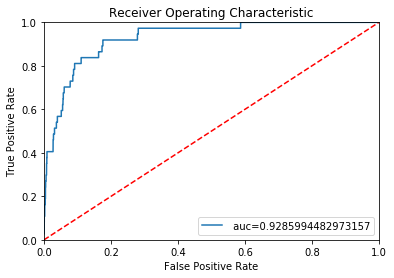

('TRAIN:', array([     1,      2,      3, ..., 236693, 236694, 236695]), 'TEST:', array([     0,     15,     22, ..., 236679, 236681, 236686]))
ssss 0.964933434873357


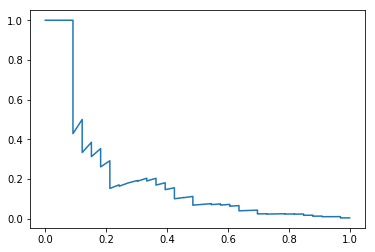

gbdt+lr: 0.964933434873357


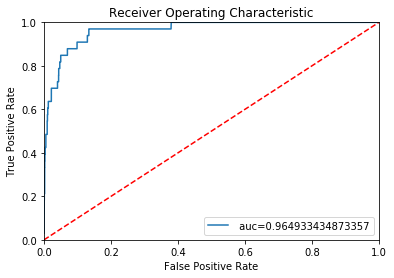

('TRAIN:', array([     0,      2,      3, ..., 236692, 236694, 236695]), 'TEST:', array([     1,      4,      6, ..., 236689, 236691, 236693]))
ssss 0.9286361327463597


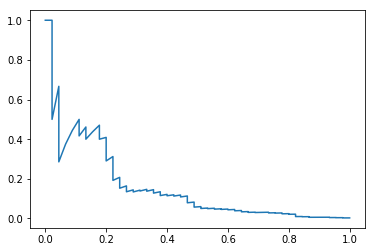

gbdt+lr: 0.9286361327463597


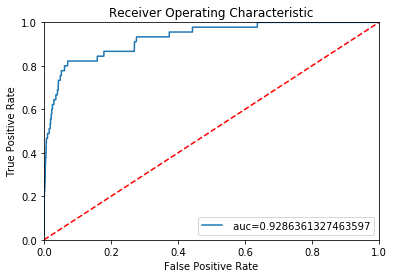

<Figure size 432x288 with 0 Axes>

In [5]:
#perform cross validation
from sklearn.model_selection import KFold
kf=KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X)
precision=[]
recall=[]
threshold=[]
prediction=[]
FP=[]
TP=[]
ROC_T=[]
test_label=[]
for train_index, test_index in kf.split(X):
    print ("TRAIN:", train_index, "TEST:", test_index)
    train_X, test_X = X[train_index], X[test_index]
    train_Y, test_Y = Y[train_index], Y[test_index]
    
    p1,r1,t1 ,pred, fpr,tpr,roc_thresholds = gbdt_lr(train_X,train_Y,test_X,test_Y)
    precision.append(p1)
    recall.append(r1)
    threshold.append(t1)
    prediction.append(pred)
    FP.append(fpr)
    TP.append(tpr)
    ROC_T.append(roc_thresholds)
    test_label.append(test_Y)
    #fpfn(test_Y,prediction)

In [17]:
ri=-1
a=[]
b=[]
for j in range(len(recall[ri])):
    if (recall[ri][j]>0.24 and precision[ri][j]>0.15) :
        print recall[ri][j], precision[ri][j],threshold[ri][j], prediction[ri][j]
fpfn(test_Y,prediction[ri],0.07)

0.26666666666666666 0.1518987341772152 0.05804345941083672 2.736661037730605e-05
0.26666666666666666 0.15384615384615385 0.060111357723058964 6.566754030129115e-05
0.26666666666666666 0.15584415584415584 0.06426853869802747 1.7284648035713557e-05
0.26666666666666666 0.15789473684210525 0.06616447140788978 6.183711333445965e-05
0.26666666666666666 0.16 0.06835510875402769 3.2076593572211215e-05
0.26666666666666666 0.16216216216216217 0.06906288575860657 6.5614798388341315e-06
0.26666666666666666 0.1643835616438356 0.07115844615126482 1.7149482014639e-05
0.24444444444444444 0.1527777777777778 0.07273347461076142 4.802670209435562e-05
0.24444444444444444 0.15492957746478872 0.07391375333131427 1.217676633334246e-05
0.24444444444444444 0.15714285714285714 0.07502793498701897 0.00011934368344769214
0.24444444444444444 0.15942028985507245 0.0752686409570084 6.699926749015904e-05
0.24444444444444444 0.16176470588235295 0.07615567226691226 4.112027471381118e-06
0.24444444444444444 0.1641791044

In [33]:
for ri in range(10):
    #for j in range(len(recall[ri])):
       # if (recall[ri][j]>0.24 and precision[ri][j]>0.15) :
            #print recall[ri][j], precision[ri][j],threshold[ri][j], prediction[ri][j]
    fpfn(test_label[ri],prediction[ri],0.05)
    print '************'


TP: 8
FP: 101
FN: 22
TN: 23539
************
TP: 12
FP: 90
FN: 22
TN: 23546
************
TP: 8
FP: 86
FN: 26
TN: 23550
************
TP: 12
FP: 103
FN: 24
TN: 23531
************
TP: 7
FP: 95
FN: 14
TN: 23554
************
TP: 13
FP: 106
FN: 26
TN: 23525
************
TP: 11
FP: 70
FN: 25
TN: 23563
************
TP: 7
FP: 88
FN: 30
TN: 23544
************
TP: 14
FP: 85
FN: 19
TN: 23551
************
TP: 14
FP: 85
FN: 31
TN: 23539
************


In [24]:
sum(prediction[0])

29.155756394101054